In [7]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# algorithms
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [8]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('floats.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [9]:
# SET UP A REGRESSION PROBLEM
# Can we predict 'Depth' using these three features:  'Salinity', 'Temperature' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Temperature', 'Salinity' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features

y_name = 'Depth'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [10]:
# Split data into training and testing datasets

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 42          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

method: mean (standard dev) max
Linear: 2.793869 (115.335264) 993.468669


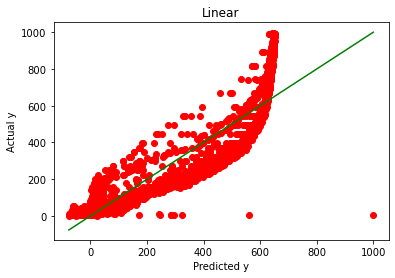

method: mean (standard dev) max
Lasso: 2.582450 (114.933704) 924.649765


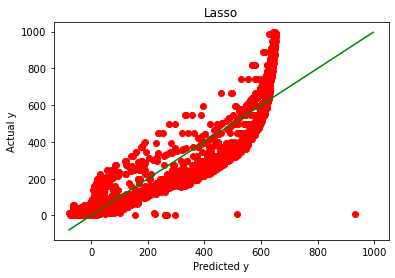

method: mean (standard dev) max
KNR: -1.694464 (60.850067) 188.400000


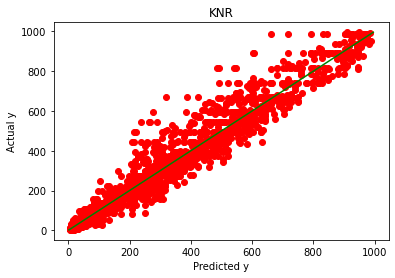

In [11]:
# Evaluate Some Regression Algorithms

# Now it is time to train some models on the data and estimate their accuracy on unseen data.

# Algorithms
models = []
models.append(('Linear', LinearRegression() )) 
models.append(('Lasso', Lasso(random_state=seed) ))
models.append(('KNR', KNeighborsRegressor() ))

results = []
for name, modelName in models:   # evaluate each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the testing data
    # What does the error look like?
    y_actual = numpy.asarray(y_test)
    y_error = y_predicted - y_actual
    results.append(y_error)
        # result statistics
    print('method: mean (standard dev) max')
    msg = "%s: %f (%f) %f" % (name, y_error.mean(), y_error.std(), y_error.max())
    print(msg)
    # Plot outputs
    LL = min([min(y_predicted), min(y_actual)])
    UR = max([max(y_predicted), max(y_actual)])
    pl.title(name)
    pl.plot(y_predicted, y_actual,'ro')
    pl.plot([LL,UR],[LL,UR], 'g-')
    pl.xlabel('Predicted y')
    pl.ylabel('Actual y')
    pl.show()